In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter

%matplotlib inline

## 1.4.4 Порядковые статистики

In [2]:
dir_to_file = os.getcwd() + '\\data\\dataset_1.4.2.txt'

In [3]:
dir_to_file

'C:\\Users\\shiro\\Desktop\\full\\6 семестр\\git-repo\\stepic-courses\\math-statistics\\1. Выборка. Описательная статистика\\data\\dataset_1.4.2.txt'

In [4]:
stat = np.loadtxt(fname = dir_to_file,delimiter=',')
stat_formatted = list(map(lambda x: float("%.2f" % x),stat))
sorted_star = np.sort(stat_formatted)
answer = np.array([sorted_star[0],sorted_star[2],sorted_star[6]])
answer

array([-1.22,  1.92,  4.87])

In [5]:
with open('data\\answer_1.4.2.txt','w') as f:
    NEWLINE_SIZE_IN_BYTES = 2  # -2 on Windows?
    np.savetxt(f, answer,  fmt = '%.2f', newline=', ', delimiter=',')
    f.seek(0, os.SEEK_END)
    f.seek(f.tell() - NEWLINE_SIZE_IN_BYTES, os.SEEK_SET)
    f.truncate()

## 1.4.5 Полигон частот

In [6]:
import pandas as pd
font_options = {'family' : 'monospace'}
figure_options = {'figsize':[17,10]}
plt.rc('font', **font_options)
plt.rc('figure', **figure_options)

In [7]:
x_i = np.array([5,3,5,3,4,5,4,5,3,3])
z = np.unique(x_i)
n_i = np.array(list(map(lambda x: len(x_i[x_i==x]), z)))

In [8]:
df = pd.DataFrame(columns = z)
df.name = '$x_i$'
df.loc['$n_i$'] = n_i
df.loc[r'$\frac{n_i}{n}$'] = n_i / len(x_i)
df.loc[r'$\sum\frac{n_i}{n}$'] = np.cumsum(df.iloc[1].values)
df

,3,4,5
$n_i$,4,2,4
$\frac{n_i}{n}$,0.4,0.2,0.4
$\sum\frac{n_i}{n}$,0.4,0.6,1


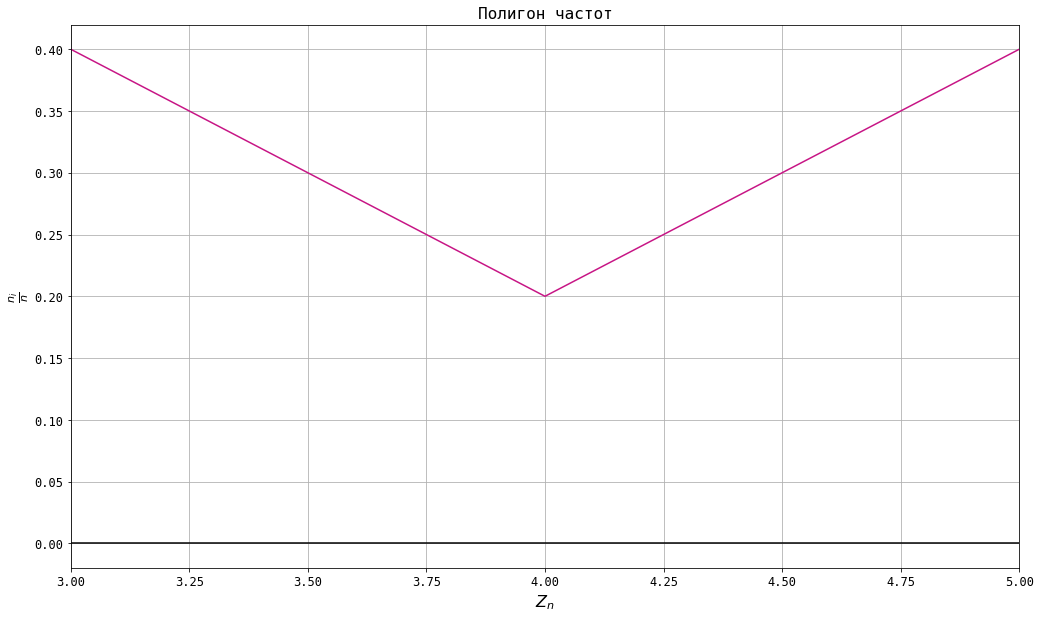

In [9]:
fig, ax = plt.subplots(1,1)
df.iloc[1].plot(ax = ax, fontsize=12, color='mediumvioletred')

ax.axhline(y=0, color='k',alpha = 1)

ax.set_title("Полигон частот", fontsize=16)
ax.set_xlabel('$Z_{n}$',fontsize=16)
ax.set_ylabel(r'$\frac{n_i}{n}$',fontsize=16)
ax.grid()

## 1.4.6 Полигон частот

Восстановите выборку по полигону частот. Полигон частот построен в абсолютных частотах. Объем выборки равен 30. В ответе надо указать вариационный ряд.
Формат ответа: элементы вариационного ряда, перечисленные через запятую с пробелом (0 знаков после запятой)

In [10]:
c = Counter(a=4,b=7,c=7,d=8,e=3,g=1)

In [11]:
l = sorted(c.elements())

In [12]:
d = {'a':1,'b':2,'c':3,'d':4,'e':5,'g':8}

In [13]:
result = np.array(list(map(d.get,l)))
result

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 8])

In [14]:
with open('data\\answer_1.4.6.txt','w') as f:
    NEWLINE_SIZE_IN_BYTES = 2  # -2 on Windows?
    np.savetxt(f, result,  fmt = '%0.0f', newline=', ', delimiter=',')
    f.seek(0, os.SEEK_END)
    f.seek(f.tell() - NEWLINE_SIZE_IN_BYTES, os.SEEK_SET)
    f.truncate()

## 1.4.7 Гистограмма

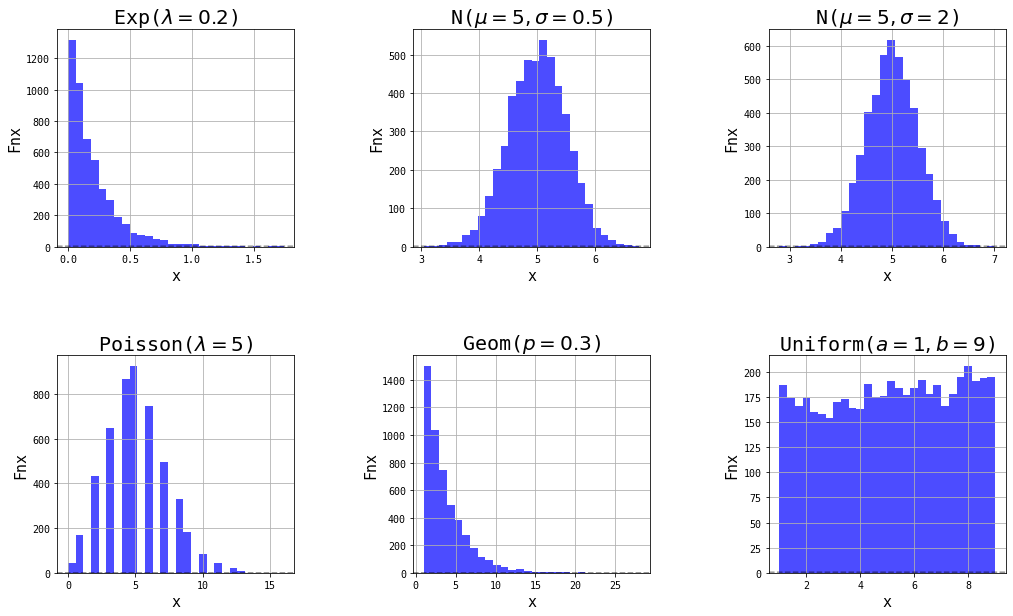

In [15]:
import itertools
products = list(itertools.product(range(2),range(3)))

def f(distribution, k = 2, n = 5000):
    x,y  = np.array([]),np.array([])
    for i in range(1,k):
        arr = {distribution == 'normal_5_05': np.random.normal(5,0.5,n),\
               distribution == 'normal_5_2': np.random.normal(5,0.5,n), \
               distribution == 'poisson': np.random.poisson(5,n),\
              distribution == 'exp': np.random.exponential(0.2,n),\
               distribution == 'geom': np.random.geometric(0.3,n),\
              distribution == 'uniform': np.random.uniform(1,9,n)}[1]
    return arr

for i in ['normal_5_05','normal_5_2', 'poisson','exp','geom','uniform']:
    exec("%s = f(distribution = '%s')" % ('x_'+i,i))

fig, ax = plt.subplots(2,3)

bins = int(1+3.2 * np.log(5000))
# bins = int(1.72 * 5000**(1/3))



np.array(list(map(lambda x: (ax[x[0],x[1]].set_xlabel('x',fontsize=15), \
                             ax[x[0],x[1]].set_ylabel('Fnx',fontsize=15)),products)))

np.array(list(map(lambda x: (ax[x[0],x[1]].grid(),ax[x[0],x[1]].axhline(y=0, color='k',alpha = 0.3,ls = '--'), \
                             ax[x[0],x[1]].axhline(y=1, color='k',alpha = 0.3,ls = '--')),products)))

ax[0,0].hist(x_exp,color = 'blue',alpha = 0.7, bins = bins,  linestyle = 'None')
ax[0,0].set_title('Exp($\lambda = 0.2$)', fontsize = 20)

ax[0,1].hist(x_normal_5_05,color = 'blue',alpha = 0.7,  bins = bins, linestyle = 'None')
ax[0,1].set_title('N($\mu=5,\sigma = 0.5$)', fontsize = 20)

ax[0,2].hist(x_normal_5_2,color = 'blue',alpha = 0.7,  bins = bins, linestyle = 'None')
ax[0,2].set_title('N($\mu=5,\sigma = 2$)', fontsize = 20)

ax[1,0].hist(x_poisson,color = 'blue',alpha = 0.7,  bins = bins, linestyle = 'None')
ax[1,0].set_title('Poisson($\lambda = 5$)', fontsize = 20)

ax[1,1].hist(x_geom,color = 'blue',alpha = 0.7,  bins = bins, linestyle = 'None')
ax[1,1].set_title('Geom($p=0.3$)', fontsize = 20)

ax[1,2].hist(x_uniform,color = 'blue',alpha = 0.7,  bins = bins, linestyle = 'None')
ax[1,2].set_title('Uniform($a=1,b=9$)', fontsize = 20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

### 1.4.10 Гистограмма по интервалам

In [16]:
x_i = np.array([1,8,4,6,2,5,3,4,3,8,5,9,5,2,3])
z = np.unique(x_i)
n_i = np.array(list(map(lambda x: len(x_i[x_i==x]), z)))

In [17]:
n=10
a = min(z) - 0.05 
b = max(z) + 0.05
delta = (max(z) + min(z))/n
s = np.arange(a,b+1,delta)
x_i.sort()
x_i
h_i = np.array([len(x_i[ (s[i] < x_i) & (x_i <= s[i+1] )]) for i in range (0, len(s)-1)]) / delta
h_i

array([1., 2., 3., 2., 3., 1., 0., 2., 1.])

По предложенной выборке постройте гистограмму, используя интервалы
`[15, 15.75], (15.75, 16.5], (16.5, 17.25], (17.25, 18.0], (18.0, 18.75], (18.75, 19.5], (19.5, 20.25], (20.25, 21.0]`
Найдите относительные частоты попадания элементов выборки в данные интервалы.

Формат ответа: относительные частоты с точностью до третьего знака после запятой через запятую с пробелом

**Решение**

In [18]:
dir_to_file = os.getcwd() + '\\data\\dataset_1.4.10.txt'
x_i = np.loadtxt(fname = dir_to_file,delimiter=',')
x_i.sort()
s = np.arange(15,22,0.75)[:-1]
n_i = np.array([len(x_i[ (s[i] < x_i) & (x_i <= s[i+1] )]) for i in range (0, len(s)-1)]) / len(x_i)
n_i

array([0.075, 0.05 , 0.25 , 0.3  , 0.175, 0.125, 0.025, 0.   ])

In [19]:
with open('data\\answer_1.4.10.txt','w') as f:
    NEWLINE_SIZE_IN_BYTES = 2  # -2 on Windows?
    np.savetxt(f, n_i,  fmt = '%0.3f', newline=', ', delimiter=',')
    f.seek(0, os.SEEK_END)
    f.seek(f.tell() - NEWLINE_SIZE_IN_BYTES, os.SEEK_SET)
    f.truncate()

## 1.4.12 Характеристики

Какая будет средняя дневная температура июля в Санкт-Петербурге в этом году? Давайте попробуем ответить на этот вопрос на основе исторических данных.  Ниже приводится средняя дневная температура июля в Санкт-Петербурге за 2002-2015 года:

`23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21`

Ответить на поставленный вопрос вам помогут следующие выборочные характеристики:

- выборочное среднее,
- выборочная дисперсия,
- выборочная медиана,
- первый квартиль,
- третий квартиль

Ответ по  заданию: значения выборочных характеристик, перечисленные в заданном порядке.


Формат ответа: значения выборочных характеристик с точностью до второго знака после запятой, перечисленные через запятую с пробелом

**Решение**

In [20]:
import math
samples = np.sort(np.array([23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21]))
n_samples = samples.size

mean = np.sum(samples) / n_samples
variance = np.sum((samples - mean) ** 2) / n_samples
median = (samples[n_samples // 2-1] + samples[n_samples // 2 + 1 -(1)]) / 2

q1 = samples[int(n_samples * 0.25+1)-1]
q3 = samples[int(n_samples * 0.75+1)-1]

res = np.array([mean,variance,median,q1,q3])

print(', '.join(['{:0.2f}']*5).format(mean, variance, median, q1, q3))

22.71, 4.35, 22.00, 21.00, 24.00


In [21]:
with open('data\\answer_1.4.12.txt','w') as f:
    NEWLINE_SIZE_IN_BYTES = 2  # -2 on Windows?
    np.savetxt(f, res,  fmt = '%0.2f', newline=', ', delimiter=',')
    f.seek(0, os.SEEK_END)
    f.seek(f.tell() - NEWLINE_SIZE_IN_BYTES, os.SEEK_SET)
    f.truncate()

## 1.4.13 Boxplot

Как строятся ящики с усами?

- Центральная жирная линия - выборочная медиана
- Ящик имеет границы $Q_1$ и $Q_3$
- Границы усов:
    - $Q_3 + 1.5 \cdot IQR$, где $Q_3 - Q_1$, либо наибольшее значение
    - $Q_3 - 1.5 \cdot IQR$, где $Q_3 - Q_1$, либо наибольшее значение
    
В самом ящике содержатся 50 процентов наблюдений

## 1.4.14

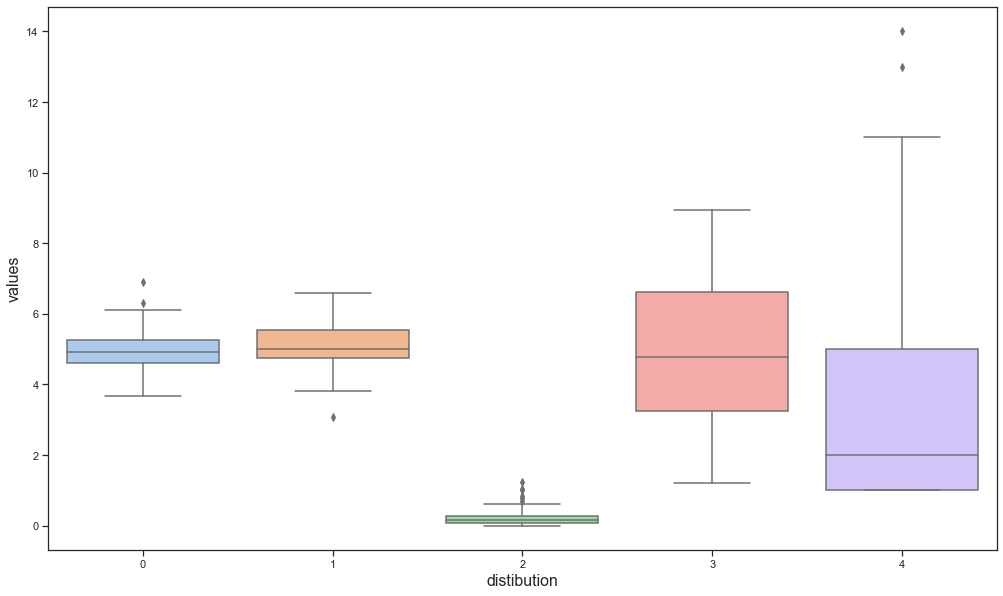

In [22]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")
products = list(itertools.product(range(2),range(3)))

def f(distribution, k = 2, n = 100):
    x,y  = np.array([]),np.array([])
    for i in range(1,k):
        arr = {distribution == 'normal_5_05': np.random.normal(5,0.5,n),\
               distribution == 'normal_5_2': np.random.normal(5,0.5,n), \
               distribution == 'poisson': np.random.poisson(5,n),\
              distribution == 'exp': np.random.exponential(0.2,n),\
               distribution == 'geom': np.random.geometric(0.3,n),\
              distribution == 'uniform': np.random.uniform(1,9,n)}[1]
    return arr

for i in ['normal_5_05','normal_5_2', 'poisson','exp','geom','uniform']:
    exec("%s = f(distribution = '%s')" % ('x_'+i,i))

fig, ax = plt.subplots(1,1)

sns.boxplot( data = [x_normal_5_05,x_normal_5_2,x_exp,x_uniform,x_geom], ax = ax,orient = 'v')
ax.set_xlabel('distibution',fontsize = 16)
ax.set_ylabel('values',fontsize = 16)
# ax.set_xticks( ['N($\mu=5,\sigma = 0.5$)','N($\mu=5,\sigma = 2$)', 'Exp($\lambda=0.2$)','Uniform(1,9)','Geom(p=0.3)'])
plt.show()

## 1.4.16 Выборочный коэффициент корреляции

Найдите выборочный коэффициент корреляции между ростом и весом по данным  измерений роста и веса 10 мужчин. (Единицы измерений рост - см, вес - кг)  

`(170, 66), (182, 74),  (183, 77),  (180, 72), (175, 67), (181, 77), (187, 76), (181, 77), (178, 72), (187, 76)`

$$\hat{\rho}(\xi,\eta) = \frac{\hat{cov}}{\sqrt{S_{\xi}^2 S_{\eta}^2}} =\frac{\frac{1}{n} \sum\limits_{i=1}^n X_i Y_i - \hat{X}\hat{Y}}{S_{\xi}S_{\eta}} $$

In [23]:
sample = np.array([(170, 66), (182, 74),  (183, 77),  (180, 72), (175, 67), (181, 77), (187, 76), (181, 77), (178, 72), (187, 76)])
X = sample[:,0]
Y = sample[:,1]
answer = round((np.sum(X*Y-X.mean()*Y.mean()))/n/X.std()/Y.std(),2)
answer

0.86

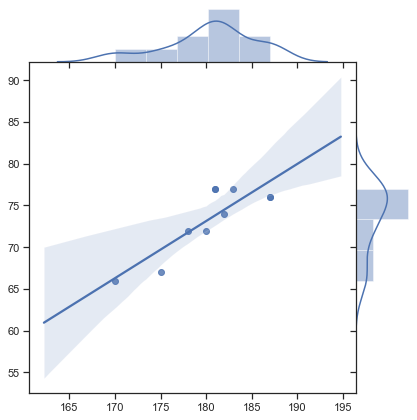

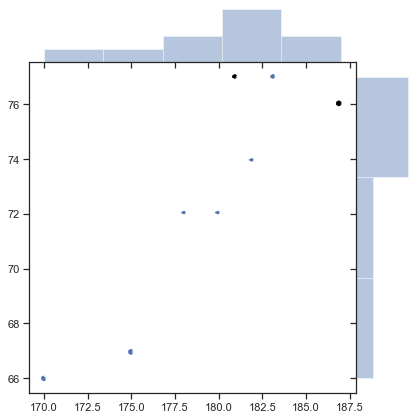

In [24]:
sns.set(style="ticks")
# sns.jointplot(x =X,y = Y, kind = 'hex',gridsize = 20,color = 'b',ratio = 6,space = 0);
sns.jointplot(x = X,y = Y, kind = 'reg',color = 'b',ratio = 6,space = 0);
sns.jointplot(x = X,y = Y, kind = 'hex', gridsize = 70, color = 'b',ratio = 6,space = 0);